<a href="https://colab.research.google.com/github/louis8ok1/LSTM_Stock/blob/master/LSTM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Part1: Data_Preprocessing

In [29]:
"""
#上傳檔案
from google.colab import files

uploaded = files.upload()
"""

'\n#上傳檔案\nfrom google.colab import files\n\nuploaded = files.upload()\n'

Normalization

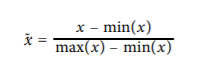

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the training set

training_set = pd.read_csv('TSMC_Stock_Train_data.csv')
#To convert the Vector form of a single column into a 2d Numpy array
training_set = training_set.iloc[:,1:2].values

#Using sklearn to normalize the training data between 0 and 1
from sklearn.preprocessing import MinMaxScaler

normal = MinMaxScaler()

training_set = normal.fit_transform(training_set)

# Getting the inputs and the ouputs
X_train = training_set[0:1252]
y_train = training_set[1:1253]

# Reshaping 

x_train = np.reshape(X_train, (1252, 1, 1))






### Part2: **Training**

EX:LSTM(units,input_shape(3,1))的units並不是cell(一個LSTM cell = 一層的LSTM)，而是**每個cell層的output dimension**

Epoch 1/2000
40/40 [==============================] - 0s 2ms/step - loss: 0.3254
Epoch 2/2000
40/40 [==============================] - 0s 1ms/step - loss: 0.2318
Epoch 3/2000
40/40 [==============================] - 0s 1ms/step - loss: 0.1639
Epoch 4/2000
40/40 [==============================] - 0s 1ms/step - loss: 0.1173
Epoch 5/2000
40/40 [==============================] - 0s 1ms/step - loss: 0.0869
Epoch 6/2000
40/40 [==============================] - 0s 1ms/step - loss: 0.0684
Epoch 7/2000
40/40 [==============================] - 0s 1ms/step - loss: 0.0581
Epoch 8/2000
40/40 [==============================] - 0s 1ms/step - loss: 0.0524
Epoch 9/2000
40/40 [==============================] - 0s 1ms/step - loss: 0.0493
Epoch 10/2000
40/40 [==============================] - 0s 1ms/step - loss: 0.0475
Epoch 11/2000
40/40 [==============================] - 0s 1ms/step - loss: 0.0465
Epoch 12/2000
40/40 [==============================] - 0s 1ms/step - loss: 0.0457
Epoch 13/2000
40/40 [====

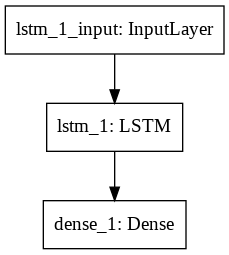

In [3]:
#	The Sequential class that will initialise RNN
# The Dense class create the output layer of RNN
# The LSTM class make RNN have "Long Memory"


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#Create the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
#1 because we have just 1 col input
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer

regressor.add(Dense(units = 1))


regressor.compile(optimizer = 'Adam',loss = 'MeanSquaredError')

#training model 
#epochs = 256 for better convergence
regressor.fit(x=x_train,y=y_train,batch_size=32,epochs=2000)

from keras.utils import plot_model
plot_model(regressor, to_file='regressor.png')





### Part3: making the prediction and Visualising the results

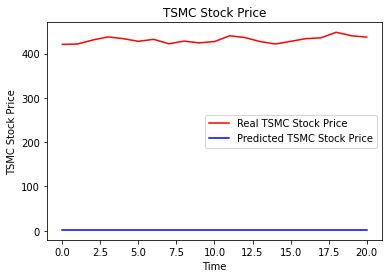

In [5]:
#Getting the real stock price of 2020 
test_set = pd.read_csv('TSMC_Stock_Test_data.csv')
real_stock_price = test_set.iloc[:,1:2].values

#Getting the predicted stock price of 2017

predicted_stock_price = real_stock_price
predicted_stock_price = normal.transform(real_stock_price)
predicted_stock_price = np.reshape(real_stock_price,(21,1,1))
##print(predicted_stock_price)

predicted_stock_price = regressor.predict(predicted_stock_price)

#Visualising the results
plt.plot(real_stock_price,color = 'red',label = 'Real TSMC Stock Price')
plt.plot(predicted_stock_price,color = 'blue',label= 'Predicted TSMC Stock Price')
plt.title('TSMC Stock Price')
plt.xlabel('Time')
plt.ylabel('TSMC Stock Price')

 
plt.legend()
plt.show()


